<a href="https://colab.research.google.com/github/SmrutiNIT/PythonBasics-May-29-Batch/blob/main/Assignment_04_Simple_Linear_Regression___delivery_time(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import statsmodels.formula.api as smf

In [4]:
#Import the dataset
delivery = pd.read_csv("/content/delivery_time (1).csv")

In [5]:
#Check the data
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
# Renaming Columns
delivery=delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
delivery

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#Performing EDA on data (Outlier, Missing Values):
Exploratory Data Analysis


1.Check for the null Values in dataset. 2.Check for the outlier in dataset

In [9]:
# Check for Null Data - No Null values
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
delivery.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Visualization

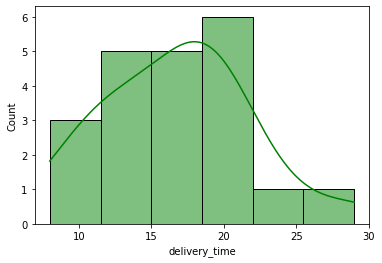

In [11]:
#Plotting Histogram to view Distribution of data field ( Univariate)
sns.histplot(delivery["delivery_time"], color ='green',kde=True)

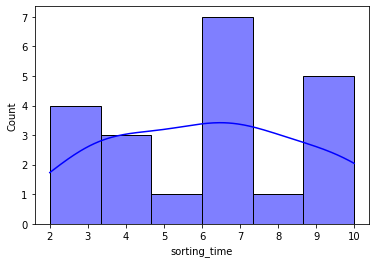

In [12]:
#Plot Histogram to view Distribution of data field ( Univariate) 
sns.histplot(delivery["sorting_time"], color ='blue',kde=True)

Outlier Identification

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


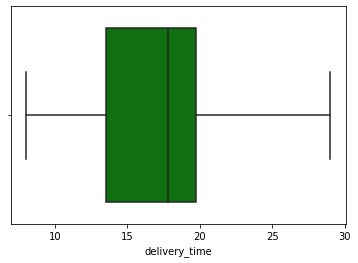

In [14]:
#Use BoxPlot to Identify any outlier in data
sns.boxplot(delivery["delivery_time"], color ='green')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


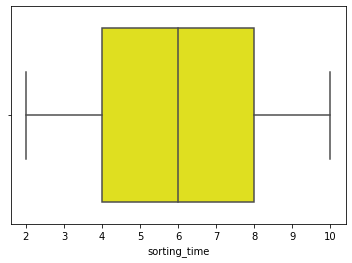

In [15]:
sns.boxplot(delivery["sorting_time"], color ='yellow')
# No Outlier found based on the boxplot analysis

#Applying Simple linear regression with OLS to create different regression model

Model -1 - Vanilla Model ( No Transformation) - y = ax+b

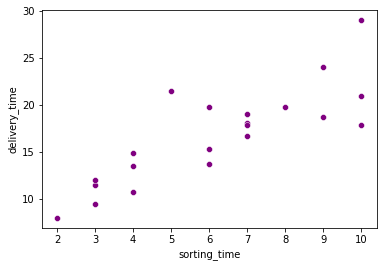

In [16]:
#Check the relation between Variable by Scatter Plot & Correlation Coefficient.
sns.scatterplot(y="delivery_time",x="sorting_time",data=delivery, color = "purple" )
#Relation Type = Linear
#Direction - Positive Correlation
#Strength -Can't Comment

In [17]:
# Finding the Correlation Coefficient (R) for the relation
# R tells the magnitude of strength of relation between y & x

In [18]:
np.corrcoef(delivery["delivery_time"],delivery["sorting_time"])
# R value is above 0.82 

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [19]:
#Using OLS & fitting model on data
import statsmodels.formula.api as smf
model1= smf.ols('delivery_time~sorting_time',data = delivery).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        18:49:05   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

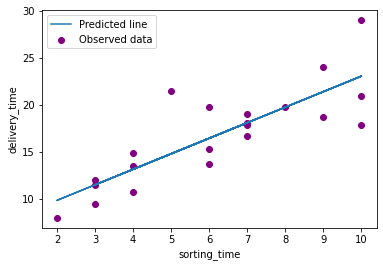

In [22]:
# Prediction Regression Line Model1
pred1 = model1.predict(pd.DataFrame(delivery['sorting_time']))
plt.scatter(x="sorting_time",y="delivery_time",data=delivery, color = "purple" )
plt.plot(delivery['sorting_time'],pred1)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')
plt.show()

In [23]:
# RMSE Error calculation (Model-1)
res1 = delivery.delivery_time - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

2.7916503270617654

Model- 2 {Log Transformation}, x = log(years); y = hike

array([[1.        , 0.83393253],
       [0.83393253, 1.        ]])

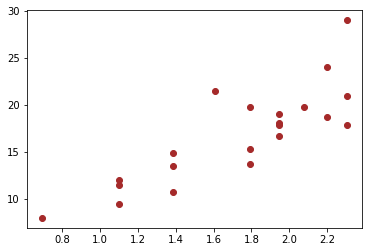

In [26]:
#Check the relation between Variable by Scatter Plot & Correlation Coefficient.
plt.scatter(x = np.log(delivery['sorting_time']), y = delivery['delivery_time'], color = 'brown')
np.corrcoef(np.log(delivery['sorting_time']),delivery['delivery_time'] ) #correlation

In [27]:
#Using OLS & fit model on data
model2= smf.ols('delivery_time ~ np.log(sorting_time)',data = delivery).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           2.64e-06
Time:                        19:01:13   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

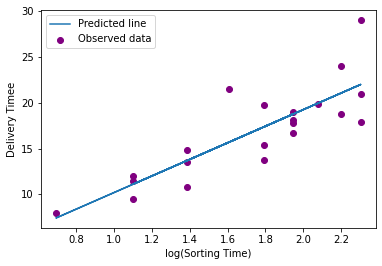

In [29]:
# Predict Regression Line for Model-2
pred2 = model2.predict(pd.DataFrame(delivery['sorting_time']))
plt.scatter(x=np.log(delivery["sorting_time"]),y="delivery_time",data= delivery, color = "purple" )
plt.plot(np.log(delivery['sorting_time']),pred2)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('log(Sorting Time)')
plt.ylabel('Delivery Timee')
plt.show()

In [30]:
# RMSE Error calculation for Model-2
res2 = delivery.delivery_time- pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

2.733171476682066

Model-3 {Exponential Method}, y=log(hike), x=year

array([[1.        , 0.84317726],
       [0.84317726, 1.        ]])

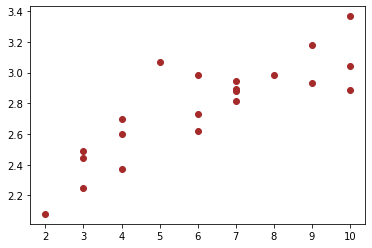

In [33]:
#Checking the relation between Variable by Scatter Plot & Correlation Coefficient.
plt.scatter(x = delivery['sorting_time'], y= np.log(delivery['delivery_time']), color = 'brown') # Scatter Plot for checking relation.
np.corrcoef(delivery['sorting_time'],np.log(delivery['delivery_time']) ) #correlation

In [34]:
#Use OLS & fit model on data
import statsmodels.formula.api as smf
model3= smf.ols('np.log(delivery_time) ~ sorting_time',data = delivery).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sat, 06 Aug 2022   Prob (F-statistic):           1.59e-06
Time:                           19:11:00   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

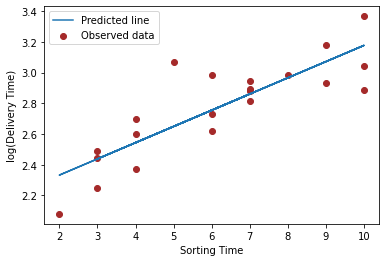

In [35]:
# Predict Regression Line for Model-3
pred3 = model3.predict(pd.DataFrame(delivery['sorting_time']))
pred3_exp = np.exp(pred3)
plt.scatter(x =(delivery['sorting_time']), y = np.log(delivery['delivery_time']), color = 'brown')
plt.plot(delivery['sorting_time'],pred3)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('Sorting Time')
plt.ylabel('log(Delivery Time)')
plt.show()

In [36]:
#  RMSE Error calculation
res3 = delivery.delivery_time - pred3_exp
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

2.9402503230562007

Model-4 Polynomial of Transformation of Degree 2 ( Quadratic) , y=ax^2+bx+c --> {x = years ; x^2 = (years)^2 ; y = hike}

In [37]:
#Use OLS & fit model on data
model4 = smf.ols('delivery_time ~ sorting_time + I(sorting_time*sorting_time)', data = delivery).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           2.39e-05
Time:                        19:16:38   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          3.5222      4.160      0.847      0.408      -5.217      12.261
sorting_time                       2.8130      1.461      1.926      0.070      -0.256       5.882
I(sorting_time * sorting_time)    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
pred4 = model4.predict(pd.DataFrame(delivery))
X = delivery.iloc[:, 0:1].values

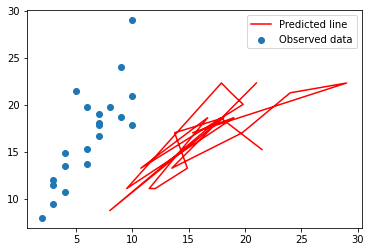

In [39]:
plt.scatter(delivery.sorting_time,delivery.delivery_time)
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [40]:
# Error calculation
res4 = delivery.delivery_time - pred4
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

2.742148203780122

In [41]:
# Choosing the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,2.791650
1,Log model,2.733171
2,Exp model,2.940250
3,Poly model,2.742148


In [42]:
#From above observation, Our Best model is Model-3 {Exponential Method}
#Best Model Selection from 4 Model tested Based on R , R^2 & RMSE Value